# Google Colab OpenVINO Pretrained Model 人體姿態估測範例
使用OpenVINO及預訓練模型human-pose-estimation-0007進行姿態估測。  
歐尼克斯實境互動工作室 OmniXRI Jack, 2022/05/11  

# 1. 安裝Intel OpenVINO工具包
以apt方式安裝OpenVINO，安裝版本為 2021.4.572  
預設安裝路徑為/opt/intel/OpenVINO_2021.4.572，系統會自建出/opt/intel/ OpenVINO_2021捷徑名稱，後續可使用這個較短捷徑名稱。  
若想安裝其它版本，可透過下列指令進行查詢。  
!apt-cache search intel-openvino

In [1]:
# 顯示目前工作目錄
!pwd
# 取得OpenVINO 2021公開金錀
!wget https://apt.repos.intel.com/openvino/2021/GPG-PUB-KEY-INTEL-OPENVINO-2021 
# 加入OpenVINO公開金錀到系統金錀群中
!apt-key add GPG-PUB-KEY-INTEL-OPENVINO-2021 
# 建立更新安裝清單檔案
!touch /etc/apt/sources.list.d/intel-openvino-2021.list
# 將下載指令加入安裝清單中
!echo "deb https://apt.repos.intel.com/openvino/2021 all main" >> /etc/apt/sources.list.d/intel-openvino-2021.list
# 更新系統
!apt update
# 安裝OpenVINO到虛擬機系統中
!apt install intel-openvino-dev-ubuntu18-2021.4.752
# 列出安裝路徑下內容進行確認
!ls /opt/intel

/content
--2022-05-10 20:29:16--  https://apt.repos.intel.com/openvino/2021/GPG-PUB-KEY-INTEL-OPENVINO-2021
Resolving apt.repos.intel.com (apt.repos.intel.com)... 23.76.91.211, 2600:1417:76:487::4b23, 2600:1417:76:48b::4b23
Connecting to apt.repos.intel.com (apt.repos.intel.com)|23.76.91.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 939 [binary/octet-stream]
Saving to: ‘GPG-PUB-KEY-INTEL-OPENVINO-2021’

GPG-PUB-KEY-INTEL-O 100%[===================>]     939  --.-KB/s    in 0s      

2022-05-10 20:29:17 (32.8 MB/s) - ‘GPG-PUB-KEY-INTEL-OPENVINO-2021’ saved [939/939]

OK
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://apt.repos.intel.com/openvino/2021 all InRelease [5,659 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidi

# 2.下載模型

可選用人體姿態估測模型為

 *   human-pose-estimation-0001
 *   human-pose-estimation-0005
 *   human-pose-estimation-0006
 *   human-pose-estimation-0007

這裡選用 **--name human-pose-estimation-0007** （可自行變更所需模型名稱）  
注意！執行OpenVINO功能前記得設定環境變數（setupvars.sh），否則會得到錯誤訊息。

In [2]:
# 執行環境設定批次檔並以模型下載器取得模型
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
python /opt/intel/openvino_2021/deployment_tools/tools/model_downloader/downloader.py \
--name human-pose-estimation-0007

[setupvars.sh] OpenVINO environment initialized
################|| Downloading human-pose-estimation-0007 ||################

========== Downloading /content/intel/human-pose-estimation-0007/FP32/human-pose-estimation-0007.xml
... 100%, 1058 KB, 1035 KB/s, 1 seconds passed

========== Downloading /content/intel/human-pose-estimation-0007/FP32/human-pose-estimation-0007.bin
... 100%, 31837 KB, 10925 KB/s, 2 seconds passed

========== Downloading /content/intel/human-pose-estimation-0007/FP16/human-pose-estimation-0007.xml
... 100%, 1058 KB, 999 KB/s, 1 seconds passed

========== Downloading /content/intel/human-pose-estimation-0007/FP16/human-pose-estimation-0007.bin
... 100%, 15918 KB, 7475 KB/s, 2 seconds passed



# 3.模型轉換

如果下載的是Intel Pretrained Model則不需轉換就自帶IR檔(xml,bin)  
若是Public Pretrained Model則須進行轉換成IR檔，系統會自動判別。  
--name 參數為待轉換模型名稱

In [3]:
# 下載及安裝test-generator 方便檢查程式運行錯誤
!pip3 install test-generator==0.1.1

# 執行環境設定批次檔並將下載到的模型檔進行轉換產生IR(xml & bin)檔
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
python3 /opt/intel/openvino_2021/deployment_tools/tools/model_downloader/converter.py \
--name human-pose-estimation-0007

# 檢查模型轉檔後會產生/FP16, FP32不同精度的IR檔(xml, bin)
!ls intel/human-pose-estimation-0007
!ls intel/human-pose-estimation-0007/FP32

[setupvars.sh] OpenVINO environment initialized
========== Skipping human-pose-estimation-0007 (no conversions defined)

FP16  FP32
human-pose-estimation-0007.bin	human-pose-estimation-0007.xml


# 4.準備測試影像

從網路獲取任意一張測試影像並另存成input.jpg並顯示。  
若要從Github中取得影像時，需將原檔案路徑修改為原始檔型式。  
首先在Github原始影像上以滑鼠右鍵點擊，選擇「複製圖片鏈結」取得影像原始網址，例：  
https://github.com/OmniXRI/NTUST_EdgeAI_2022/blob/main/Ch7_Implementations/Dataset/pose_estimation_01.jpg  
接著修改後檔名：主要是將github.com變成raw.githubusercontent.com，把/blob/main改成master路徑名稱，其它子路徑保留  
https://raw.githubusercontent.com/OmniXRI/NTUST_EdgeAI_2022/master/Ch7_Implementations/Dataset/pose_estimation_01.jpg 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  del sys.path[0]


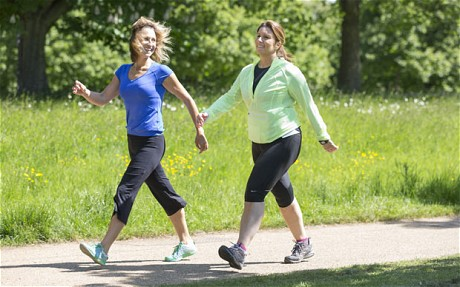

In [7]:
# 以OpenCV檢視輸入影像
import cv2 # 導入OpenCV套件包
from google.colab.patches import cv2_imshow # 導入顯示OpenCV格式影像套件包
import numpy as np # 導入numpy套件包
import requests # 導入requests套件包

# Github獲取一張影像
file = requests.get("https://raw.githubusercontent.com/OmniXRI/NTUST_EdgeAI_2022/master/Ch7_Implementations/Dataset/pose_estimation_01.jpg")
# 從網路獲取一張影像
#file = requests.get("https://www.getactivecornwall.co.uk/files/imagelibrary/walking-2.jpg")

# 將影像轉成OpenCV格式存檔並顯示
img = cv2.imdecode(np.fromstring(file.content, np.uint8), 1)
cv2.imwrite('input.jpg',img)
cv2_imshow(img) # 顯示輸入影像

為更清楚了解物件偵測範例程式可支援的模型，可將models.lst及使用方式列出來確認。（此步驟可忽略）

In [5]:
# 列出可支援的模型名稱及對應的結構類型(architecture_type)
!cat /opt/intel/openvino_2021/inference_engine/demos/human_pose_estimation_demo/python/models.lst
# 列出物件偵測程式的參數說明文件
!cat /opt/intel/openvino_2021/inference_engine/demos/human_pose_estimation_demo/python/python/README.md

# This file can be used with the --list option of the model downloader.
# For --architecture_type=openpose
human-pose-estimation-0001
# For --architecture_type=ae
human-pose-estimation-0005
human-pose-estimation-0006
human-pose-estimation-0007
# For --architecture_type=higherhrnet
higher-hrnet-w32-human-pose-estimation
cat: /opt/intel/openvino_2021/inference_engine/demos/human_pose_estimation_demo/python/python/README.md: No such file or directory


# 5.進行推論

物件偵測範例程式 object_detection_demo.py

輸入參數： -at 架構型式(architecture_type) 須參考models.lst指定方式，  **architecture_type=openpose**  
*   human-pose-estimation-0001  

**architecture_type=ae**  
*   human-pose-estimation-0005  
*   human-pose-estimation-0006  
*   human-pose-estimation-0007  

**architecture_type=higherhrnet**    
*   higher-hrnet-w32-human-pose-estimation  

-i 輸入影像名稱 (.png, .jpg ...)  
-m 模型名稱 (.xml)  
-o 輸出結果名稱 (.png, *.jpg ...)  

最後顯示推論結果

[setupvars.sh] OpenVINO environment initialized
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy

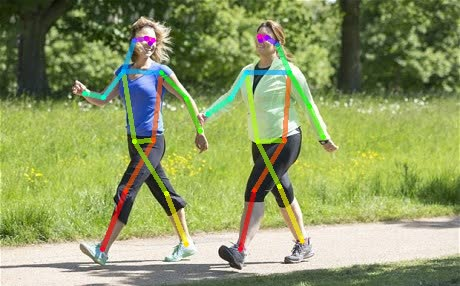

In [8]:
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
python3 \
/opt/intel/openvino_2021/deployment_tools/inference_engine/demos/human_pose_estimation_demo/python/human_pose_estimation_demo.py \
-at ae \
-i 'input.jpg' \
-m intel/human-pose-estimation-0007/FP32/human-pose-estimation-0007.xml \
-o 'output.jpg'

out_img = cv2.imread("output.jpg") # 讀入結果影像
cv2_imshow(out_img) # 顯示結果影像